___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Категорийные (категориальные) графики - вычисление метрик по категориям

**Категорийные (категориальные) данные** - такие данные, которые содержат набор отдельных значений. Например, страны или компании. В отличие от чисел, здесь отдельные значения не располагаются на шкале значений. Например, для стран нет значений, которые бы располагались "между" Германией и Францией. Или для компаний - нет компании "между" Google и Apple. Понятие шкалы значений относится к другим переменным - непрерывным - например, возраст или цена.

Чтобы начать строить графики для категориальных переменных, давайте посмотрим на агрегатные метрики внутри категорий. По сути это означает, что мы будем отображать на графике некоторые агрегирующие функции - например, среднее (mean) или количество (count). Мы можем посчитать эти метрики с помощью pandas, но чтобы было понятнее, лучше визуализировать эти данные на графике.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Данные

In [2]:
df = pd.read_csv("dm_office_sales.csv")

In [3]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


## Countplot()

График показывает количество строк для каждой из категорий. 

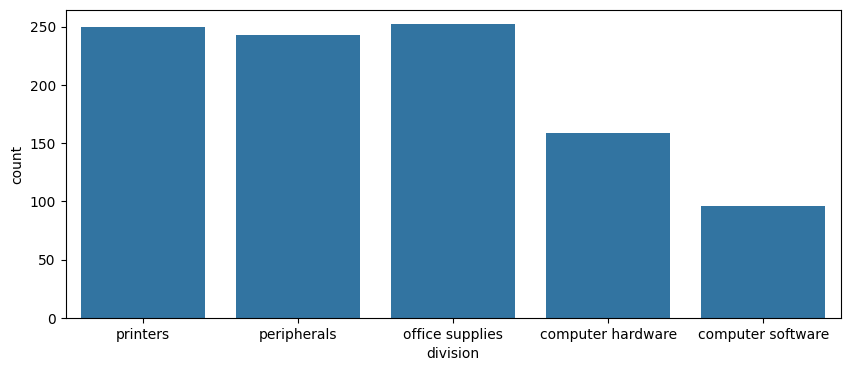

In [5]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(x='division',data=df);

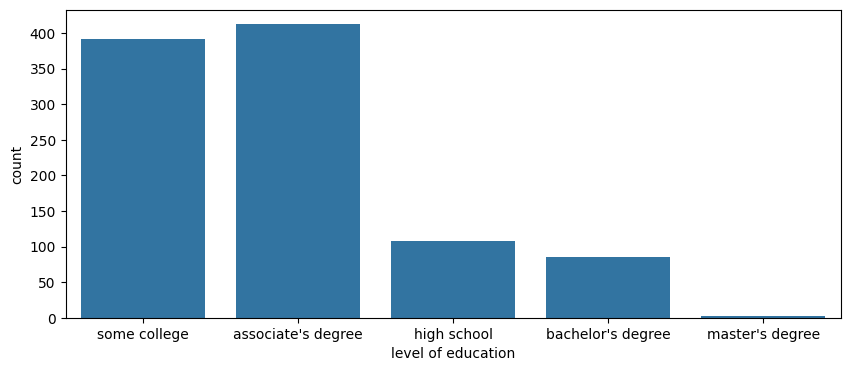

In [7]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(x='level of education',data=df);

### Добавляем подкатегории с помощью параметра 'hue'

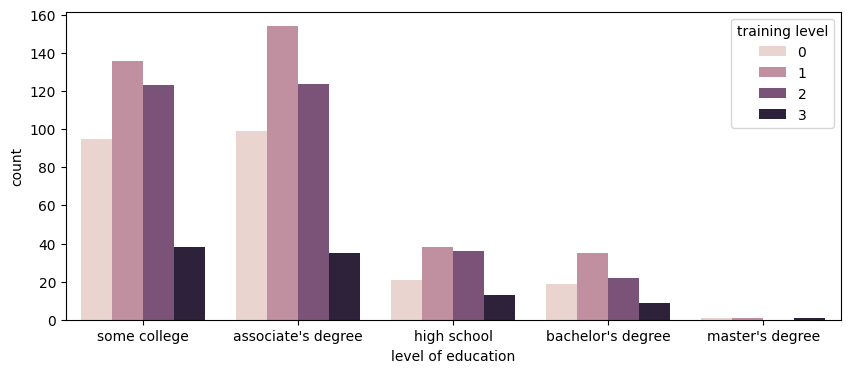

In [8]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(x='level of education',data=df,hue='training level');

**Замечание: Вы всегда можете отредактировать палитру по Вашему вкусу с помощью matplotlib [colormap](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)**

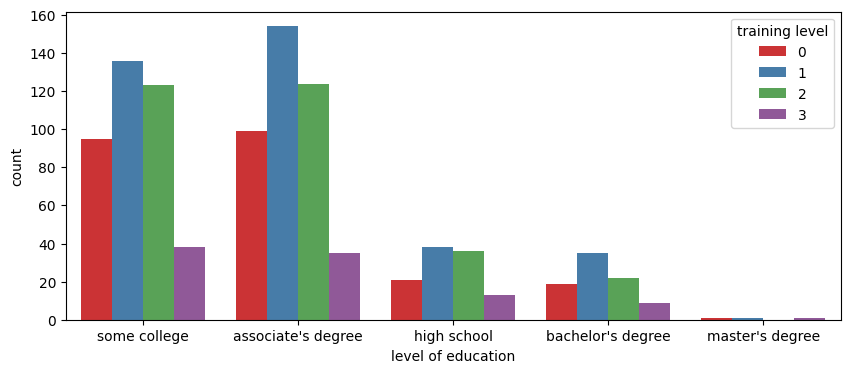

In [9]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(x='level of education',data=df,hue='training level',palette='Set1');

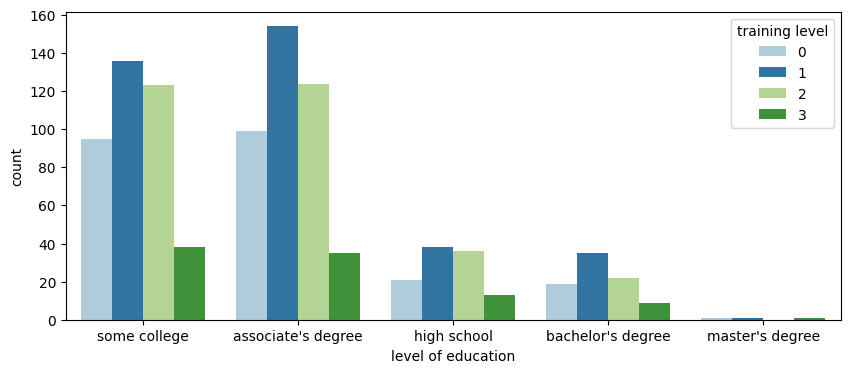

In [10]:
plt.figure(figsize=(10,4),dpi=100)
# Палитра Paired была бы очень кстати, если у нас был бы явный скачок от 0 и 1 до 2 и 3
sns.countplot(x='level of education',data=df,hue='training level',palette='Paired');

# barplot()

До этого мы по умолчанию откладывали по оси "y" количество count, по аналогии с командой .groupby(x_axis).count() в pandas. Но мы также можем добавить некоторую непрерывную переменную по оси "y". Обратите внимание - будьте аккуратны с этими графиками: иногда в результате построения таких графиков может показаться, что по оси "y" нанесены непрерывные значения, хотя это может быть и не так.

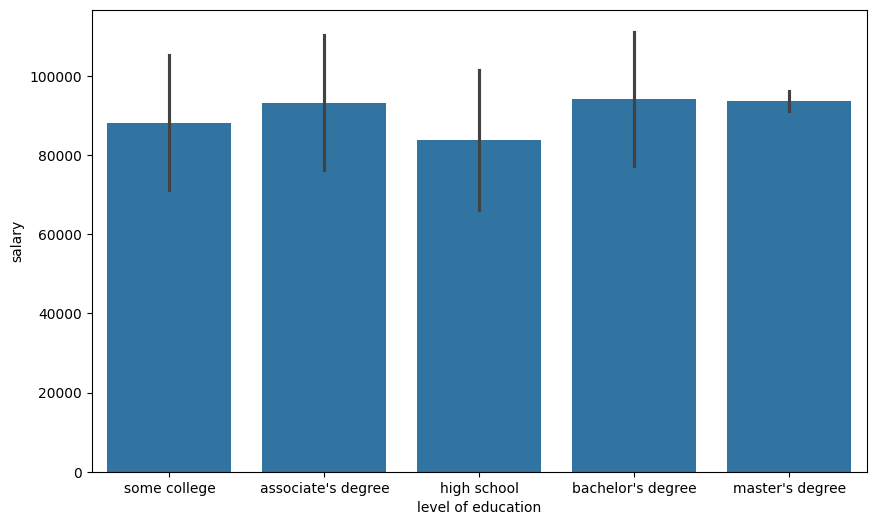

In [13]:
plt.figure(figsize=(10,6),dpi=100)
# По умолчанию barplot() показывает среднее значение - mean
# Статья о чёрных полосках на столбиках: 
# https://stackoverflow.com/questions/58362473/what-does-black-lines-on-a-seaborn-barplot-mean
sns.barplot(x='level of education', y='salary', data=df, estimator=np.mean, errorbar='sd');

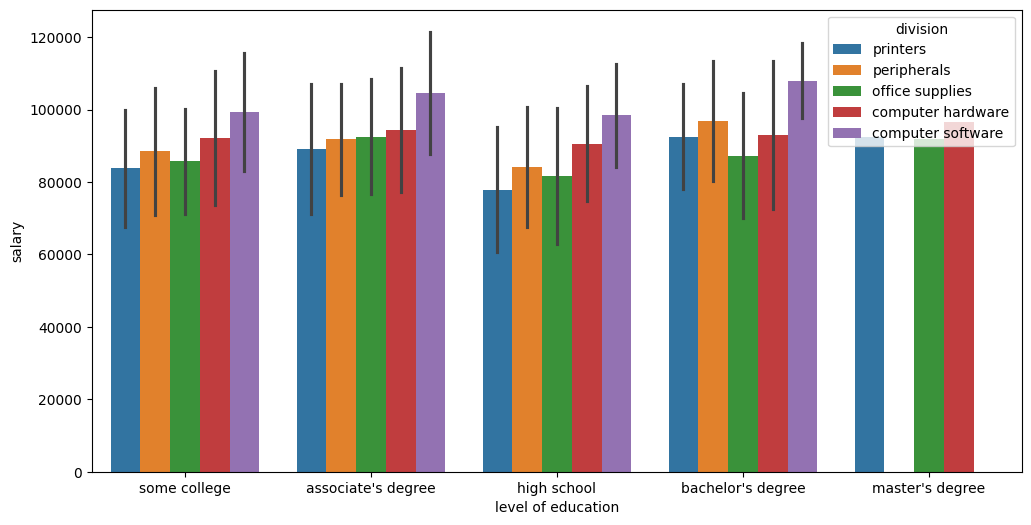

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x='level of education',y='salary',data=df,estimator=np.mean,errorbar='sd',hue='division');

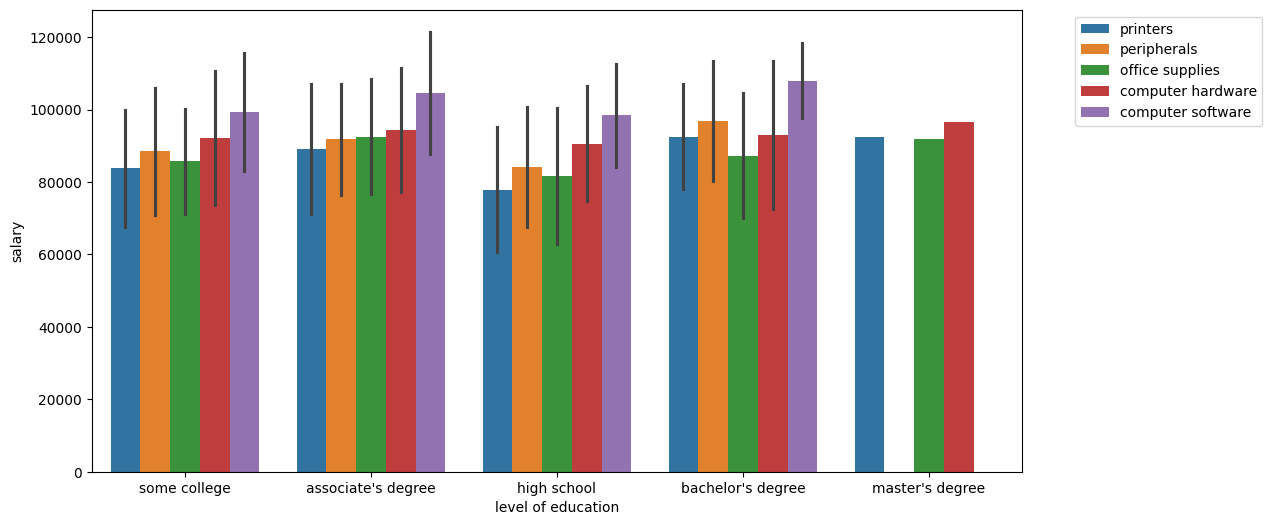

In [16]:
plt.figure(figsize=(12,6),dpi=100)

# Статья о том, как переместить легенду на графике seaborn:
# https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
sns.barplot(x='level of education',y='salary',data=df,estimator=np.mean,errorbar='sd',hue='division')

plt.legend(bbox_to_anchor=(1.05, 1)); # можно использовать или loc, или bbox_to_anchor

--------
--------